In [ ]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/requierements.ipynb

In [ ]:
ssh_hf = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/Filtrage/ssh_hf/ssh_hf_01.nc")

In [ ]:
ssh_hf_1h = ssh_hf.rename({'__xarray_dataarray_variable__': 'ssh_hf'}).sel(time_counter=pd.to_datetime('2014-01-03T15:30:00'))

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaspari_cohn(array, distance, center):
    if type(array) is float or type(array) is int:
        array = np.array([array])
    else:
        array = array
    if distance <= 0:
        return np.zeros_like(array)
    else:
        array = 2 * np.abs(array - center * np.ones_like(array)) / distance
        gp = np.zeros_like(array)
        i = np.where(array <= 1.)[0]
        gp[i] = -0.25 * array[i]**5 + 0.5 * array[i]**4 + 0.625 * array[i]**3 - 5./3. * array[i]**2 + 1.
        i = np.where((array > 1.) * (array <= 2.))[0]
        gp[i] = 1./12. * array[i]**5 - 0.5 * array[i]**4 + 0.625 * array[i]**3 + 5./3. * array[i]**2 - 5. * array[i] + 4. - 2./3. / array[i]
    return gp


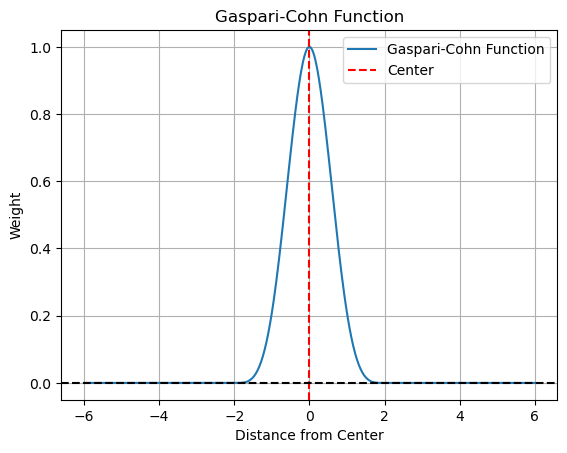

In [2]:
# Parameters
center = 0
distance = 2
x = np.linspace(-3 * distance, 3 * distance, 500)
y = gaspari_cohn(x, distance, center)

# Plotting
plt.figure()
plt.plot(x, y, label='Gaspari-Cohn Function')
plt.axvline(center, color='r', linestyle='--', label='Center')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Distance from Center')
plt.ylabel('Weight')
plt.title('Gaspari-Cohn Function')
plt.legend()
plt.grid(True)
plt.show()


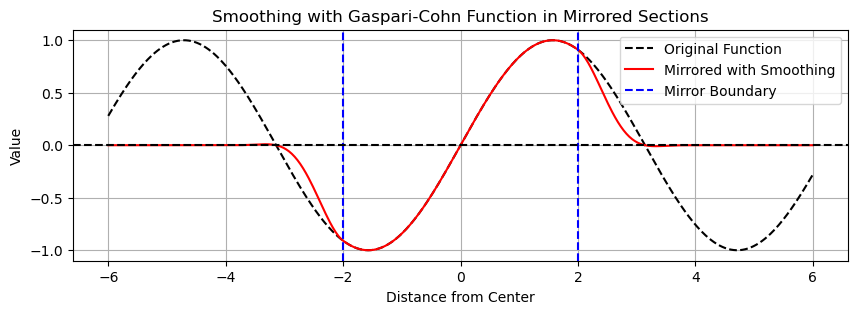

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gaspari_cohn(array, distance, center):
    if type(array) is float or type(array) is int:
        array = np.array([array])
    else:
        array = array
    if distance <= 0:
        return np.zeros_like(array)
    else:
        array = 2 * np.abs(array - center * np.ones_like(array)) / distance
        gp = np.zeros_like(array)
        i = np.where(array <= 1.)[0]
        gp[i] = -0.25 * array[i]**5 + 0.5 * array[i]**4 + 0.625 * array[i]**3 - 5./3. * array[i]**2 + 1.
        i = np.where((array > 1.) * (array <= 2.))[0]
        gp[i] = 1./12. * array[i]**5 - 0.5 * array[i]**4 + 0.625 * array[i]**3 + 5./3. * array[i]**2 - 5. * array[i] + 4. - 2./3. / array[i]
    return gp

# Define the function to be mirrored
def original_function(x):
    return np.sin(x)

# Parameters
center = 0
distance = 2
x = np.linspace(-3 * distance, 3 * distance, 500)

# Original function values
y_original = original_function(x)

# Apply Gaspari-Cohn for smoothing in the mirrored sections
left_indices = x < -distance
right_indices = x > distance

left_mirror = gaspari_cohn(x[left_indices], distance, -distance) * y_original[left_indices]
right_mirror = gaspari_cohn(x[right_indices], distance, distance) * y_original[right_indices]

# Initialize y_combined with y_original values
y_combined = y_original.copy()

# Combine all parts
y_combined[left_indices] = left_mirror
y_combined[right_indices] = right_mirror

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(x, y_original, 'k--', label='Original Function')  # Original function
plt.plot(x, y_combined, 'r', label='Mirrored with Smoothing')  # Smoothed function
plt.axvline(-distance, color='b', linestyle='--', label='Mirror Boundary')
plt.axvline(distance, color='b', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Distance from Center')
plt.ylabel('Value')
plt.title('Smoothing with Gaspari-Cohn Function in Mirrored Sections')
plt.legend()
plt.grid(True)
plt.show()


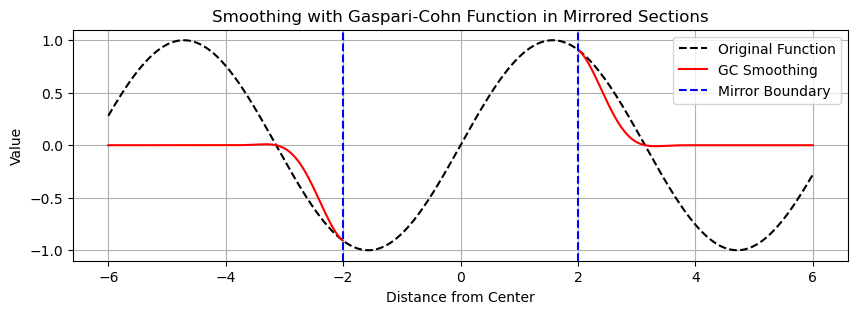

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def gaspari_cohn(array, distance, center):
    if type(array) is float or type(array) is int:
        array = np.array([array])
    else:
        array = array
    if distance <= 0:
        return np.zeros_like(array)
    else:
        array = 2 * np.abs(array - center * np.ones_like(array)) / distance
        gp = np.zeros_like(array)
        i = np.where(array <= 1.)[0]
        gp[i] = -0.25 * array[i]**5 + 0.5 * array[i]**4 + 0.625 * array[i]**3 - 5./3. * array[i]**2 + 1.
        i = np.where((array > 1.) * (array <= 2.))[0]
        gp[i] = 1./12. * array[i]**5 - 0.5 * array[i]**4 + 0.625 * array[i]**3 + 5./3. * array[i]**2 - 5. * array[i] + 4. - 2./3. / array[i]
    return gp

# Define the function to be mirrored
def original_function(x):
    return np.sin(x)

# Parameters
center = 0
distance = 2
x = np.linspace(-3 * distance, 3 * distance, 500)

# Original function values
y_original = original_function(x)

# Apply Gaspari-Cohn for smoothing in the mirrored sections
left_indices = x < -distance
right_indices = x > distance

left_mirror = gaspari_cohn(x[left_indices], distance, -distance) * y_original[left_indices]
right_mirror = gaspari_cohn(x[right_indices], distance, distance) * y_original[right_indices]

# Initialize y_combined with y_original values
y_combined = y_original.copy()

# Combine all parts
y_combined[left_indices] = left_mirror
y_combined[right_indices] = right_mirror

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(x, y_original, 'k--', label='Original Function')  # Original function
plt.plot(x[left_indices], left_mirror, 'r')  # Left smoothed function
plt.plot(x[right_indices], right_mirror, 'r', label='GC Smoothing')  # Right smoothed function
plt.axvline(-distance, color='b', linestyle='--', label='Mirror Boundary')
plt.axvline(distance, color='b', linestyle='--')
#plt.axhline(0, color='k', linestyle='-')
plt.xlabel('Distance from Center')
plt.ylabel('Value')
plt.title('Smoothing with Gaspari-Cohn Function in Mirrored Sections')
plt.legend()
plt.grid(True)
plt.show()


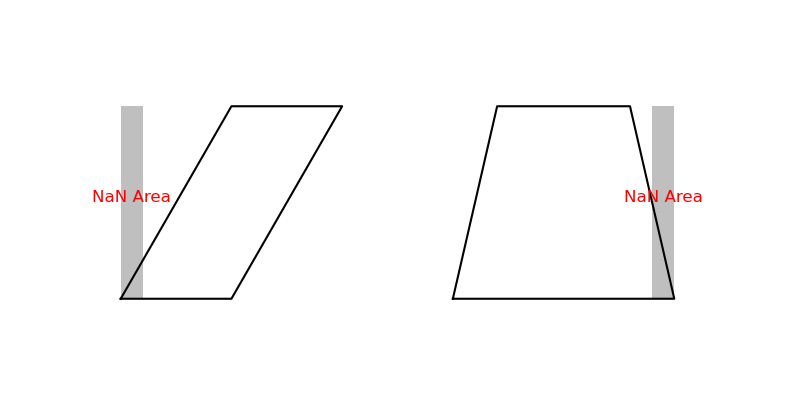

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Define the coordinates for the two shapes
left_shape = np.array([
    [0, 0],
    [0.5, 1],
    [1, 1],
    [0.5, 0],
    [0, 0]
])

right_shape = np.array([
    [1.5, 0],
    [1.7, 1],
    [2.3, 1],
    [2.5, 0],
    [1.5, 0]
])

# Plot the left shape
ax.plot(left_shape[:, 0], left_shape[:, 1], 'k-')

# Plot the right shape
ax.plot(right_shape[:, 0], right_shape[:, 1], 'k-')

# Highlight the areas with NaNs
# Assuming the left and right shapes are affected by NaNs on the left and right sides respectively
nan_areas = [
    [[0, 0], [0, 1], [0.1, 1], [0.1, 0], [0, 0]],  # Left NaN area
    [[2.4, 0], [2.4, 1], [2.5, 1], [2.5, 0], [2.4, 0]]  # Right NaN area
]

for area in nan_areas:
    area = np.array(area)
    ax.fill(area[:, 0], area[:, 1], 'gray', alpha=0.5)

# Add annotations
ax.text(0.05, 0.5, 'NaN Area', color='red', fontsize=12, ha='center')
ax.text(2.45, 0.5, 'NaN Area', color='red', fontsize=12, ha='center')

# Set the limits and hide axes
ax.set_xlim(-0.5, 3)
ax.set_ylim(-0.5, 1.5)
ax.axis('off')

# Show the plot
plt.show()


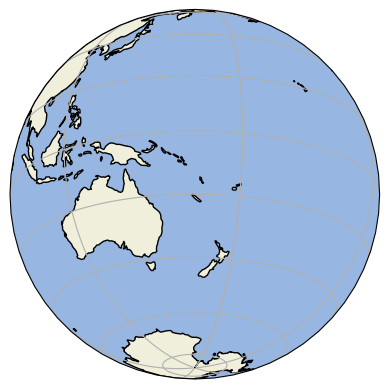

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(165, -20))

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    plt.show()

if __name__ == '__main__':
    main()



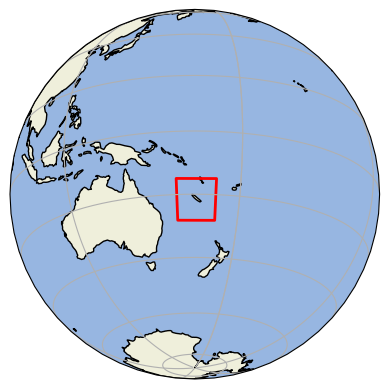

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path
from shapely.geometry import Polygon

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(165, -20))

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    # Define the coordinates of the square
    lon_min, lon_max = 159, 172
    lat_min, lat_max = -28, -15
    square_coords = [(lon_min, lat_min), (lon_min, lat_max), 
                     (lon_max, lat_max), (lon_max, lat_min), 
                     (lon_min, lat_min)]
    
    # Create the polygon for the square
    square = Polygon(square_coords)
    square_path = geos_to_path([square])
    
    ax.add_geometries([square], crs=ccrs.PlateCarree(), 
                      edgecolor='red', facecolor='none', linewidth=2)

    plt.show()

if __name__ == '__main__':
    main()


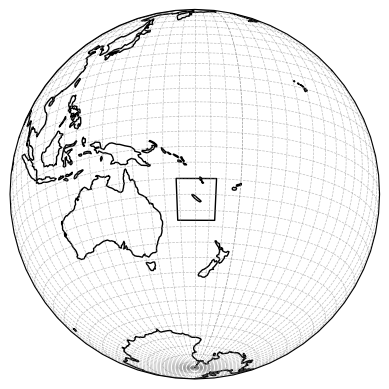

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path
from shapely.geometry import Polygon

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(165, -20))

    # Black and white land and ocean
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='none')

    ax.set_global()

    # Adjust gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = plt.MultipleLocator(5)  # Set interval for longitude lines
    gl.ylocator = plt.MultipleLocator(5)  # Set interval for latitude lines

    # Define the coordinates of the square
    lon_min, lon_max = 159, 172
    lat_min, lat_max = -28, -15
    square_coords = [(lon_min, lat_min), (lon_min, lat_max), 
                     (lon_max, lat_max), (lon_max, lat_min), 
                     (lon_min, lat_min)]
    
    # Create the polygon for the square
    square = Polygon(square_coords)
    square_path = geos_to_path([square])
    
    ax.add_geometries([square], crs=ccrs.PlateCarree(), 
                      edgecolor='black', facecolor='none', linewidth=1)

    plt.show()

if __name__ == '__main__':
    main()


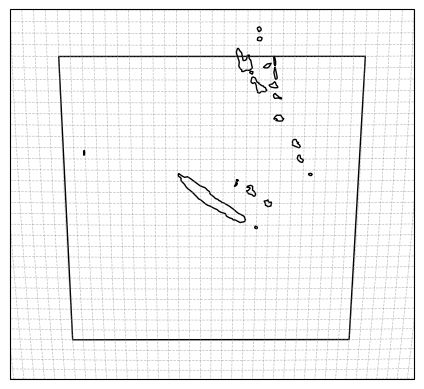

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path
from shapely.geometry import Polygon

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Geostationary(central_longitude=165))

    # Black and white land and ocean
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='none')

    # Define the original coordinates of the square
    lon_min, lon_max = 159, 172
    lat_min, lat_max = -28, -15

    # Set extent to zoom out 10 degrees beyond the original square's boundaries
    ax.set_extent([lon_min - 2, lon_max + 2, lat_min - 2, lat_max + 2], crs=ccrs.PlateCarree())
    

    # Adjust gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = plt.MultipleLocator(0.5)  # Set interval for longitude lines
    gl.ylocator = plt.MultipleLocator(0.5)  # Set interval for latitude lines

    # Define the coordinates of the original square
    square_coords = [(lon_min, lat_min), (lon_min, lat_max), 
                     (lon_max, lat_max), (lon_max, lat_min), 
                     (lon_min, lat_min)]
    
    # Create the polygon for the original square
    square = Polygon(square_coords)
    ax.add_geometries([square], crs=ccrs.PlateCarree(), 
                      edgecolor='black', facecolor='none', linewidth=1)

    plt.show()

if __name__ == '__main__':
    main()


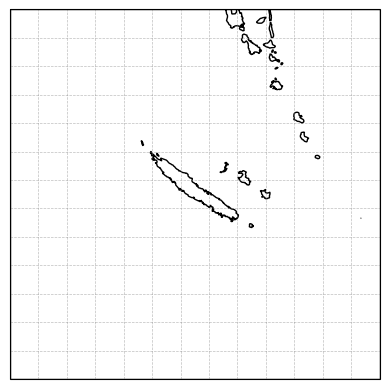

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.patch import geos_to_path
from shapely.geometry import Polygon

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Black and white land and ocean
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='none')

    # Define the original coordinates of the square
    lon_min, lon_max = 159, 172
    lat_min, lat_max = -28, -15

    # Set extent to show only the area inside the original square's boundaries
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Adjust gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = plt.MultipleLocator(1)  # Set finer interval for longitude lines
    gl.ylocator = plt.MultipleLocator(1)  # Set finer interval for latitude lines

    # Define the coordinates of the original square
    square_coords = [(lon_min, lat_min), (lon_min, lat_max), 
                     (lon_max, lat_max), (lon_max, lat_min), 
                     (lon_min, lat_min)]
    
    # Create the polygon for the original square
    square = Polygon(square_coords)
    ax.add_geometries([square], crs=ccrs.PlateCarree(), 
                      edgecolor='black', facecolor='none', linewidth=1)

    plt.show()

if __name__ == '__main__':
    main()


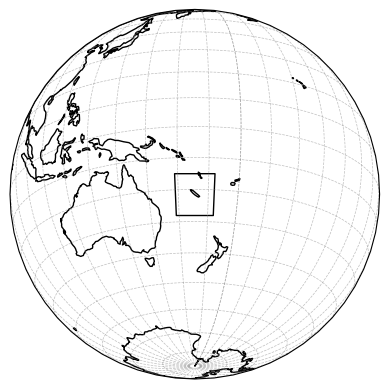

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(165.5, -21.5))

    # Black and white land and ocean
    ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='white')
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor='none')

    # Define the original coordinates of the square
    lon_min, lon_max = 159, 172
    lat_min, lat_max = -28, -15

    # Define the coordinates of the original square
    square_coords = [(lon_min, lat_min), (lon_min, lat_max), 
                     (lon_max, lat_max), (lon_max, lat_min), 
                     (lon_min, lat_min)]
    
    # Create the polygon for the original square
    square = Polygon(square_coords)
    ax.add_geometries([square], crs=ccrs.PlateCarree(), 
                      edgecolor='black', facecolor='none', linewidth=1)

    # Set global to adjust the zoom level manually
    ax.set_global()

    # Adjust gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = plt.MultipleLocator(10)  # Adjust intervals as needed
    gl.ylocator = plt.MultipleLocator(10)  # Adjust intervals as needed

    plt.show()

if __name__ == '__main__':
    main()


In [39]:
import numpy as np

# Define the coordinate ranges
lon_min, lon_max = 159, 172
lat_min, lat_max = -28, -15

# Create a grid of coordinates
lon_values = np.linspace(lon_min, lon_max, num=100)  # Number of points in the grid
lat_values = np.linspace(lat_min, lat_max, num=100)

# Create the meshgrid
lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

# Display the shape of the grid to verify
print(f"Longitude grid shape: {lon_grid.shape}")
print(f"Latitude grid shape: {lat_grid.shape}")


Longitude grid shape: (100, 100)
Latitude grid shape: (100, 100)


In [40]:
import numpy as np

# Define the boundaries
lon_min, lon_max = 159, 172
lat_min, lat_max = -28, -15

# Define the resolution
# Assuming a resolution of 1 degree for simplicity
lon_resolution = 1
lat_resolution = 1

# Generate the grid points
lons = np.arange(lon_min, lon_max + lon_resolution, lon_resolution)
lats = np.arange(lat_min, lat_max + lat_resolution, lat_resolution)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the meshgrid for easy iteration
lon_grid_flat = lon_grid.flatten()
lat_grid_flat = lat_grid.flatten()

# Combine lon and lat to form coordinate pairs
coordinates = list(zip(lon_grid_flat, lat_grid_flat))

# Displaying the coordinates
for coord in coordinates:
    print(coord)


(159, -28)
(160, -28)
(161, -28)
(162, -28)
(163, -28)
(164, -28)
(165, -28)
(166, -28)
(167, -28)
(168, -28)
(169, -28)
(170, -28)
(171, -28)
(172, -28)
(159, -27)
(160, -27)
(161, -27)
(162, -27)
(163, -27)
(164, -27)
(165, -27)
(166, -27)
(167, -27)
(168, -27)
(169, -27)
(170, -27)
(171, -27)
(172, -27)
(159, -26)
(160, -26)
(161, -26)
(162, -26)
(163, -26)
(164, -26)
(165, -26)
(166, -26)
(167, -26)
(168, -26)
(169, -26)
(170, -26)
(171, -26)
(172, -26)
(159, -25)
(160, -25)
(161, -25)
(162, -25)
(163, -25)
(164, -25)
(165, -25)
(166, -25)
(167, -25)
(168, -25)
(169, -25)
(170, -25)
(171, -25)
(172, -25)
(159, -24)
(160, -24)
(161, -24)
(162, -24)
(163, -24)
(164, -24)
(165, -24)
(166, -24)
(167, -24)
(168, -24)
(169, -24)
(170, -24)
(171, -24)
(172, -24)
(159, -23)
(160, -23)
(161, -23)
(162, -23)
(163, -23)
(164, -23)
(165, -23)
(166, -23)
(167, -23)
(168, -23)
(169, -23)
(170, -23)
(171, -23)
(172, -23)
(159, -22)
(160, -22)
(161, -22)
(162, -22)
(163, -22)
(164, -22)
(165, -22)

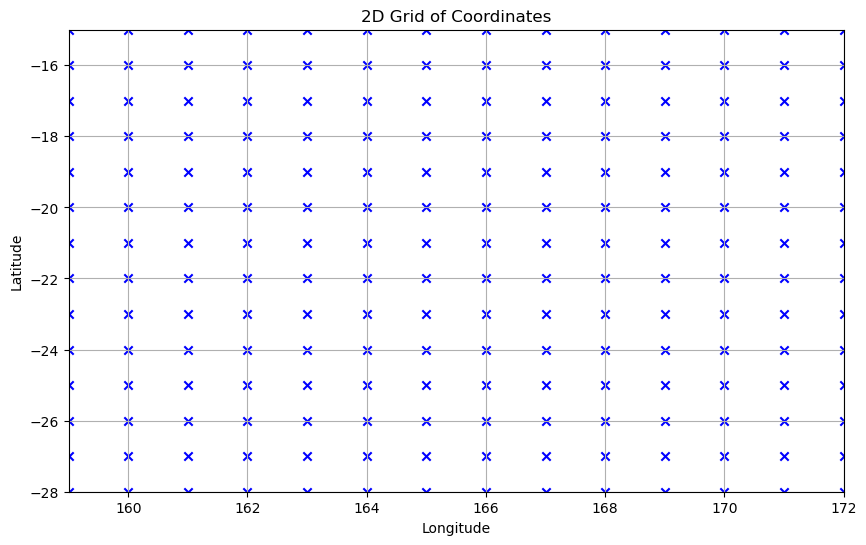

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the boundaries
lon_min, lon_max = 159, 172
lat_min, lat_max = -28, -15

# Define the resolution
lon_resolution = 1
lat_resolution = 1

# Generate the grid points
lons = np.arange(lon_min, lon_max + lon_resolution, lon_resolution)
lats = np.arange(lat_min, lat_max + lat_resolution, lat_resolution)

# Create a meshgrid
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Flatten the meshgrid for easy iteration
lon_grid_flat = lon_grid.flatten()
lat_grid_flat = lat_grid.flatten()

# Plotting the grid
plt.figure(figsize=(10, 6))
plt.scatter(lon_grid_flat, lat_grid_flat, color='blue', marker='x')
plt.title('2D Grid of Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.show()


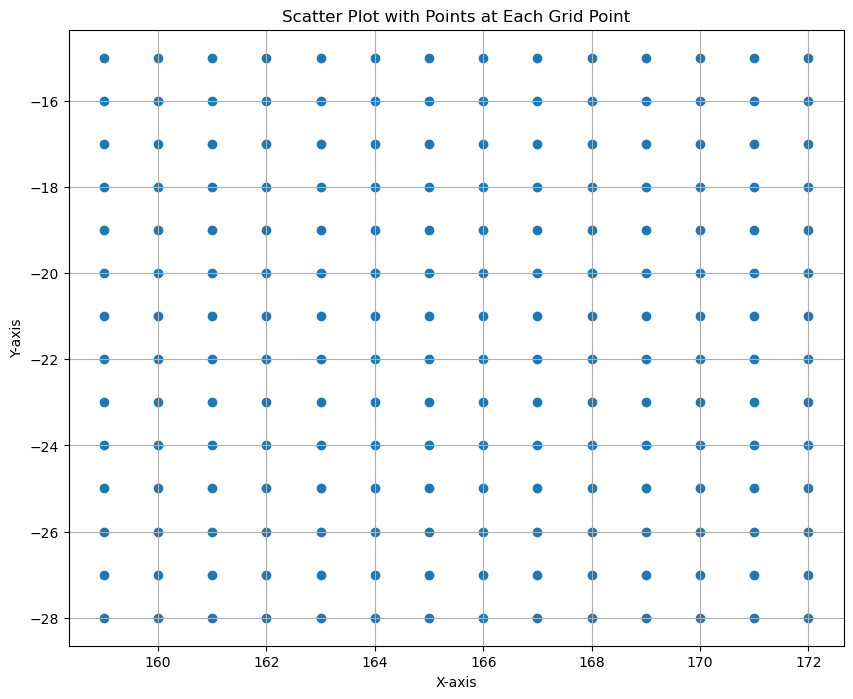

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range
x_min, x_max = 159, 172
y_min, y_max = -28, -15

# Generate the grid points
x = np.arange(x_min, x_max + 1)
y = np.arange(y_min, y_max + 1)
X, Y = np.meshgrid(x, y)

# Flatten the grid points for plotting
X_flat = X.flatten()
Y_flat = Y.flatten()

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(X_flat, Y_flat)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Points at Each Grid Point')
plt.grid(True)
plt.show()


In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range
x_min, x_max = 159, 172
y_min, y_max = -28, -15

# Generate the grid points
x = np.arange(x_min, x_max + 1)
y = np.arange(y_min, y_max + 1)

# Flatten the grid points for plotting
X, Y = np.meshgrid(x, y)
X_flat = X.flatten()
Y_flat = Y.flatten()

# Modify y-coordinates for progressive spacing
# More space at the top, closer together at the bottom
scaling_factor = 2.0  # Change this factor to control the spacing
Y_flat = y_min + (Y_flat - y_min) / ((y_max - y_flat) / scaling_factor)

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(X_flat, Y_flat)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Progressive Spacing in Y-axis')
plt.grid(True)
plt.show()


NameError: name 'y_flat' is not defined

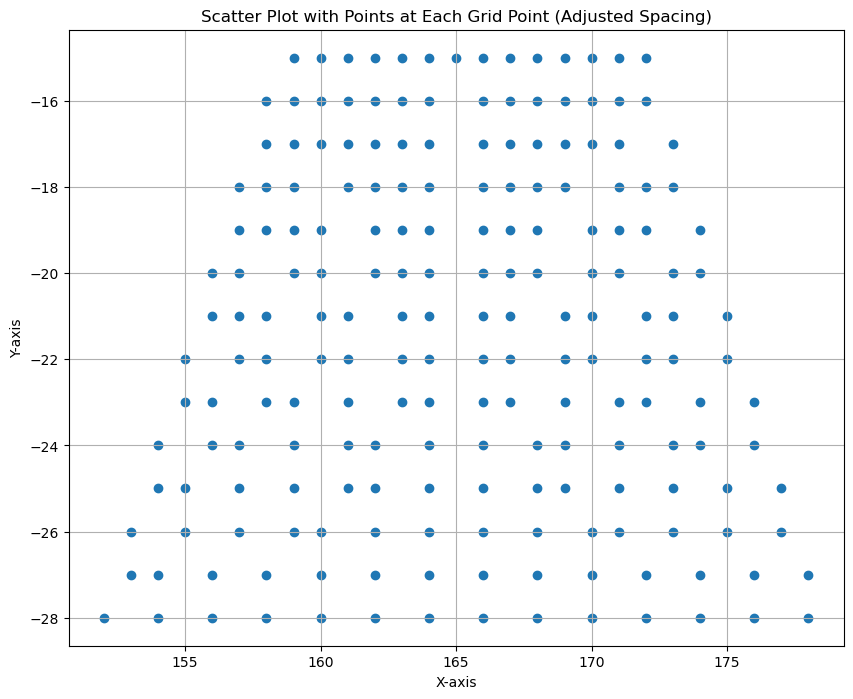

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range
x_min, x_max = 159, 172
y_min, y_max = -28, -15

# Generate the grid points
x = np.arange(x_min, x_max + 1)
y = np.arange(y_min, y_max + 1)
X, Y = np.meshgrid(x, y)

# Flatten the grid points for plotting
X_flat = X.flatten()
Y_flat = Y.flatten()

# Adjust the X values based on their Y values
spacing_factor = np.linspace(2, 1, len(np.unique(Y_flat)))  # Create a spacing factor that decreases from top to bottom
for i, y_val in enumerate(np.unique(Y_flat)):
    indices = np.where(Y_flat == y_val)
    X_flat[indices] = X_flat[indices] * spacing_factor[i] - (np.mean(X_flat[indices]) * (spacing_factor[i] - 1))

# Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(X_flat, Y_flat)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Points at Each Grid Point (Adjusted Spacing)')
plt.grid(True)
plt.show()
